#Introduction:
In this step, I will be collecting data, making sure It's well defined and clean. 

#Recap of the problem:
Credit card fraud and every other financial fraud is considered a financial crime, people and financial institutions are usually the victims of financial fraud. The goal of this project is to develop a credit card fraud detection system to minimize the lose for financial institutions and their clients.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

First thing I started by loading my data into notebook.

In [2]:
df = pd.read_csv(r"C:\Users\mutha\Downloads\DataFrame\credit_card_fraud.csv")
df

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339602,2020-12-31 23:57:56,Schmidt-Larkin,home,12.68,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-11-09,a8310343c189e4a5b6316050d2d6b014,65.623593,-165.186033,0
339603,2020-12-31 23:58:04,"Pouros, Walker and Spence",kids_pets,13.02,Greenview,CA,41.5403,-122.9366,308,Call centre manager,1958-09-20,bd7071fd5c9510a5594ee196368ac80e,41.973127,-123.553032,0
339604,2020-12-31 23:59:07,Reilly and Sons,health_fitness,43.77,Luray,MO,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,39.946837,-91.333331,0
339605,2020-12-31 23:59:15,Rau-Robel,kids_pets,86.88,Burbank,WA,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,46.658340,-119.715054,0


In [3]:
# calling info to learn about my data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339607 entries, 0 to 339606
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  339607 non-null  object 
 1   merchant               339607 non-null  object 
 2   category               339607 non-null  object 
 3   amt                    339607 non-null  float64
 4   city                   339607 non-null  object 
 5   state                  339607 non-null  object 
 6   lat                    339607 non-null  float64
 7   long                   339607 non-null  float64
 8   city_pop               339607 non-null  int64  
 9   job                    339607 non-null  object 
 10  dob                    339607 non-null  object 
 11  trans_num              339607 non-null  object 
 12  merch_lat              339607 non-null  float64
 13  merch_long             339607 non-null  float64
 14  is_fraud               339607 non-nu

In [4]:
#changing the transaction date and time column to a datetime format.
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [5]:
df.dtypes

trans_date_trans_time    datetime64[ns]
merchant                         object
category                         object
amt                             float64
city                             object
state                            object
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                              object
trans_num                        object
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object

In [6]:
#here I am getting the customer's age out of the date of birth column.
df['dob'] = pd.to_datetime(df['dob'])
df['dob'] = 2024 - df['dob'].dt.year
df['dob']

0         46
1         62
2         79
3         57
4         57
          ..
339602    85
339603    66
339604    58
339605    43
339606    59
Name: dob, Length: 339607, dtype: int32

In [7]:
#changing the column name since it's only reflecting the customers age now.
df.rename(columns={'dob':'age'}, inplace=True)
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,age,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,46,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,62,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,79,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,57,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",57,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0


In [8]:
df.dtypes

trans_date_trans_time    datetime64[ns]
merchant                         object
category                         object
amt                             float64
city                             object
state                            object
lat                             float64
long                            float64
city_pop                          int64
job                              object
age                               int32
trans_num                        object
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object

In [9]:
#checking if DataFrame has any missing values.
df.isna().any()

trans_date_trans_time    False
merchant                 False
category                 False
amt                      False
city                     False
state                    False
lat                      False
long                     False
city_pop                 False
job                      False
age                      False
trans_num                False
merch_lat                False
merch_long               False
is_fraud                 False
dtype: bool

In [10]:
#check for duplicates
dup_rows = df[df.duplicated()]
print("duplicates rows:", dup_rows)

duplicates rows: Empty DataFrame
Columns: [trans_date_trans_time, merchant, category, amt, city, state, lat, long, city_pop, job, age, trans_num, merch_lat, merch_long, is_fraud]
Index: []


In [11]:
#Adding a day of the week, month and year columns to my data. 
df['day'] = df['trans_date_trans_time'].dt.dayofweek
df['year'] = df['trans_date_trans_time'].dt.year
df['month'] = df['trans_date_trans_time'].dt.month
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,age,trans_num,merch_lat,merch_long,is_fraud,day,year,month
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,46,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,1,2019,1
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,62,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,1,2019,1
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,79,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0,1,2019,1
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,57,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0,1,2019,1
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",57,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0,1,2019,1


In [12]:
#Adjusting the day of the week column to reflect a str corresponding to the day of the week.
day_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['day'] = df['day'].map(day_map)
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,age,trans_num,merch_lat,merch_long,is_fraud,day,year,month
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,46,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,Tue,2019,1
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,62,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,Tue,2019,1
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,79,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0,Tue,2019,1
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,57,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0,Tue,2019,1
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",57,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0,Tue,2019,1


In [13]:
#chicking for the data imbalance in the is_fraud column.
fraud_counts = df['is_fraud'].value_counts()
print("Fraud count is", fraud_counts)
fraud_ratio = fraud_counts[1] / fraud_counts.sum()
print("Fraud ratio is", fraud_ratio)

Fraud count is is_fraud
0    337825
1      1782
Name: count, dtype: int64
Fraud ratio is 0.005247241664629999


The above result shows that the fraud ratio is significantly imbalanced.

Next I am going to under samble the majority class (none fraudulent transaction) to balance the dataset with the minority class (fraudulent transaction)

In [14]:
majority_class = df[df['is_fraud'] == 0]
minority_class = df[df['is_fraud'] == 1]
majority_downsampled = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)
balanced_df = pd.concat([majority_downsampled, minority_class])
balanced_df = balanced_df.sample(frac=1, random_state=42)

In [15]:
balanced_df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,age,trans_num,merch_lat,merch_long,is_fraud,day,year,month
111069,2019-09-14 03:29:08,Rau and Sons,grocery_pos,314.70,Glendale,CA,34.1556,-118.2322,172817,"Accountant, chartered",83,66a15820cdae4179f0b26819babd4eb3,33.283670,-118.654974,1,Sat,2019,9
176587,2020-01-22 06:51:03,"Connelly, Reichert and Fritsch",gas_transport,43.51,Mesa,ID,44.6255,-116.4493,129,Cartographer,59,a78de0cd54f3d932607fb930f3293610,45.456663,-116.555030,0,Wed,2020,1
8363,2019-01-27 23:12:15,Friesen Inc,shopping_pos,795.01,Parker Dam,CA,34.2980,-114.1560,126,Marketing executive,32,527fdf7cc53f7af2e820b8b6e3d2f595,34.922036,-113.901876,1,Sun,2019,1
186580,2020-02-23 14:41:52,"Mosciski, Ziemann and Farrell",shopping_net,8.25,Hooper,NE,41.6414,-96.5232,1745,"Engineer, automotive",51,2576de962e18a80ce49c97b63da91f43,42.557041,-96.231715,0,Sun,2020,2
186775,2020-02-23 23:21:29,Brown PLC,misc_net,715.01,Carroll,NE,42.2770,-97.1926,566,Metallurgist,49,cfa8f4168b3f3e03ed2b4b4e3bb5d494,42.175045,-97.983932,1,Sun,2020,2


In [16]:
#Here we do value_counts() on is_fraud column to make sure that the data is balanced now.
balanced_df['is_fraud'].value_counts()

is_fraud
1    1782
0    1782
Name: count, dtype: int64

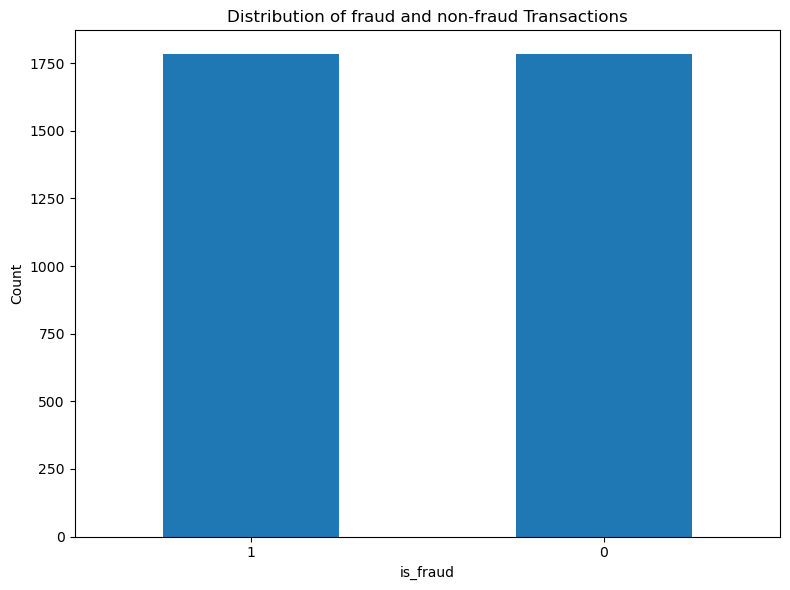

In [17]:
#further data analysis to make sure the data is balanced by bar plotting is_fraud column. 
fraud_counts = balanced_df['is_fraud'].value_counts()
plt.figure(figsize=(8, 6))
fraud_counts.plot(kind='bar')
plt.title('Distribution of fraud and non-fraud Transactions')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()

In [18]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3564 entries, 111069 to 237477
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  3564 non-null   datetime64[ns]
 1   merchant               3564 non-null   object        
 2   category               3564 non-null   object        
 3   amt                    3564 non-null   float64       
 4   city                   3564 non-null   object        
 5   state                  3564 non-null   object        
 6   lat                    3564 non-null   float64       
 7   long                   3564 non-null   float64       
 8   city_pop               3564 non-null   int64         
 9   job                    3564 non-null   object        
 10  age                    3564 non-null   int32         
 11  trans_num              3564 non-null   object        
 12  merch_lat              3564 non-null   float64       
 13  m

In [19]:
balanced_df.describe()

,trans_date_trans_time,amt,lat,long,city_pop,age,merch_lat,merch_long,is_fraud,year,month
count,3564,3564.000000,3564.000000,3564.000000,3.564000e+03,3564.000000,3564.000000,3564.000000,3564.00000,3564.000000,3564.000000
mean,2019-12-27 12:01:39.398428672,292.928490,39.936028,-111.065367,1.179566e+05,54.425365,39.921045,-111.075074,0.50000,2019.468575,6.733726
min,2019-01-01 00:22:36,1.050000,20.027100,-165.672300,4.600000e+01,23.000000,19.078440,-166.651656,0.00000,2019.000000,1.000000
25%,2019-07-03 23:32:51,19.827500,36.715400,-120.646600,5.090000e+02,40.000000,36.724523,-120.498411,0.00000,2019.000000,4.000000
50%,2019-12-19 17:30:01.500000,90.845000,39.741700,-111.794100,1.645000e+03,52.000000,39.682099,-111.421038,0.50000,2019.000000,7.000000
75%,2020-06-23 19:43:31.500000,373.605000,42.277000,-99.384400,3.570500e+04,67.000000,42.320819,-99.672526,1.00000,2020.000000,10.000000
max,2020-12-31 20:48:16,1371.810000,66.693300,-89.628700,2.383912e+06,97.000000,67.510267,-88.646366,1.00000,2020.000000,12.000000
std,NaN,362.321909,5.606036,13.380987,3.143559e+05,17.919732,5.652903,13.409414,0.50007,0.499081,3.457951


One of the important steps in data wrangling is checking for outlaiers and process them to ensure that they don't unduly influence the analysis results or the machine learning models.

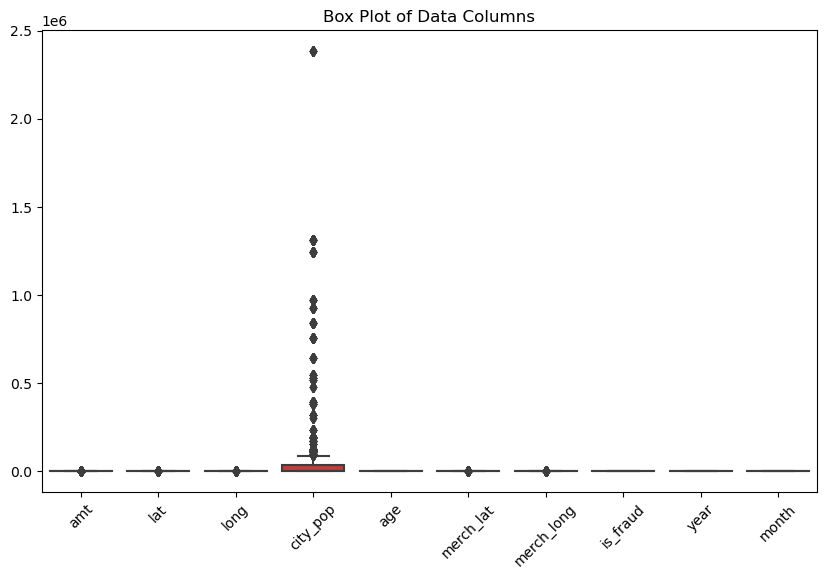

In [20]:
#Now I will be checking for potential outlaiers
plt.figure(figsize=(10, 6))
sns.boxplot(data=balanced_df)
plt.title('Box Plot of Data Columns')
plt.xticks(rotation=45)
plt.show()

Next I will be processing outliers.

In [21]:
#First step in processing outliers is by defining a function to handle outliers in each column.
def replace_outliers(column):
    median_value = column.median()
    column[column > column.quantile(0.95)] = median_value
    return column

In [22]:
balanced_df['amt'] = replace_outliers(balanced_df['amt'])
balanced_df['lat'] = replace_outliers(balanced_df['lat'])
balanced_df['long'] = replace_outliers(balanced_df['long'])
balanced_df['city_pop'] = replace_outliers(balanced_df['city_pop'])
balanced_df['merch_lat'] = replace_outliers(balanced_df['merch_lat'])
balanced_df['merch_long'] = replace_outliers(balanced_df['merch_long'])

C:\Users\mutha\AppData\Local\Temp\ipykernel_23356\1569922337.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column > column.quantile(0.95)] = median_value
C:\Users\mutha\AppData\Local\Temp\ipykernel_23356\1569922337.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column > column.quantile(0.95)] = median_value
C:\Users\mutha\AppData\Local\Temp\ipykernel_23356\1569922337.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [23]:
balanced_df.describe()

,trans_date_trans_time,amt,lat,long,city_pop,age,merch_lat,merch_long,is_fraud,year,month
count,3564,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.00000,3564.000000,3564.000000
mean,2019-12-27 12:01:39.398428672,242.074364,39.213289,-112.059362,57369.034512,54.425365,39.185882,-112.119199,0.50000,2019.468575,6.733726
min,2019-01-01 00:22:36,1.050000,20.027100,-165.672300,46.000000,23.000000,19.078440,-166.651656,0.00000,2019.000000,1.000000
25%,2019-07-03 23:32:51,19.827500,36.715400,-120.646600,509.000000,40.000000,36.724523,-120.498411,0.00000,2019.000000,4.000000
50%,2019-12-19 17:30:01.500000,90.837500,39.741700,-111.794100,1645.000000,52.000000,39.682058,-111.422651,0.50000,2019.000000,7.000000
75%,2020-06-23 19:43:31.500000,319.897500,41.540300,-104.660000,18408.000000,67.000000,41.578404,-104.625485,1.00000,2020.000000,10.000000
max,2020-12-31 20:48:16,1026.880000,47.663300,-91.768900,841711.000000,97.000000,47.942606,-91.873612,1.00000,2020.000000,12.000000
std,NaN,312.317047,4.212164,12.585936,154730.564554,17.919732,4.247595,12.557949,0.50007,0.499081,3.457951


In [24]:
df = balanced_df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3564 entries, 111069 to 237477
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  3564 non-null   datetime64[ns]
 1   merchant               3564 non-null   object        
 2   category               3564 non-null   object        
 3   amt                    3564 non-null   float64       
 4   city                   3564 non-null   object        
 5   state                  3564 non-null   object        
 6   lat                    3564 non-null   float64       
 7   long                   3564 non-null   float64       
 8   city_pop               3564 non-null   int64         
 9   job                    3564 non-null   object        
 10  age                    3564 non-null   int32         
 11  trans_num              3564 non-null   object        
 12  merch_lat              3564 non-null   float64       
 13  m

In [25]:
df.to_csv('preprocessed_data2.csv', index=False)

#Summary:
step1) Loaded data into notebook
step2) Investigated data
step3) Changed date of birth column to only reflect the age
step4) Added day, month and year columns, these columns are big help identifing fraud patterns
step5) Checked for missing and duplicate values
step6) Checked and processed outliers

#Conclusion:
In conclusion, I have balanced data and free of missing or duplicate values. next step is to visualise the relationship among columns.